# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('Unemployment in India.csv')
df.columns = df.columns.str.strip()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking columns names

In [3]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Checking for missing values

## Region

In [4]:
df['Region'].value_counts(dropna=False)

Region
Andhra Pradesh      28
Kerala              28
NaN                 28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [5]:
df['Region'].isnull().sum()

28

In [21]:
nan_index_region = df[df['Region'].isnull()].index.tolist()

## Date

In [6]:
df['Date'].value_counts(dropna=False)

Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
NaN            28
Name: count, dtype: int64

In [8]:
nan_index_date = df[df['Date'].isnull()].index.tolist()

## Frequency

In [10]:
df['Frequency'] = df['Frequency'].str.replace(' Monthly', 'Monthly')
df['Frequency'].value_counts(dropna=False)

Frequency
Monthly    740
NaN         28
Name: count, dtype: int64

In [11]:
nan_index_freq = df[df['Frequency'].isnull()].index.tolist()

## Estimated Unemployment Rate

In [12]:
df['Estimated Unemployment Rate (%)'].value_counts(dropna=False)

Estimated Unemployment Rate (%)
NaN      28
0.00     11
3.31      4
5.35      3
3.66      3
         ..
13.70     1
4.03      1
40.59     1
3.69      1
9.86      1
Name: count, Length: 625, dtype: int64

In [13]:
nan_index_unemp = df[df['Estimated Unemployment Rate (%)'].isnull()].index.tolist()

## Estimated Employed

In [15]:
df['Estimated Employed'].value_counts(dropna=False)

Estimated Employed
NaN          28
247210.0      1
233029.0      1
241366.0      1
246596.0      1
             ..
6021921.0     1
6395022.0     1
6164215.0     1
6189471.0     1
9088931.0     1
Name: count, Length: 741, dtype: int64

In [16]:
nan_index_emp = df[df['Estimated Employed'].isnull()].index.tolist()

## Estimated Labour Participation Rate

In [17]:
df['Estimated Labour Participation Rate (%)'].value_counts(dropna=False)

Estimated Labour Participation Rate (%)
NaN      28
40.43     3
42.82     3
39.92     3
43.25     3
         ..
44.08     1
46.50     1
45.79     1
44.79     1
40.67     1
Name: count, Length: 627, dtype: int64

In [18]:
nan_index_labour = df[df['Estimated Labour Participation Rate (%)'].isnull()].index.tolist()

## Area

In [19]:
df['Area'].value_counts(dropna=False)

Area
Urban    381
Rural    359
NaN       28
Name: count, dtype: int64

In [20]:
nan_index_area = df[df['Area'].isnull()].index.tolist()

# Checking if all null rows are same

In [22]:
Null = [nan_index_region, nan_index_date, nan_index_freq, nan_index_unemp, nan_index_emp, nan_index_labour, nan_index_area]

for x in range(0, len(Null)):
    for y in range(x + 1, len(Null)):
        if not set(Null[x]).intersection(Null[y]):
            print(f'No intersection between {x} and {y}')

In [23]:
df = df.dropna()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


# Visualizing the data

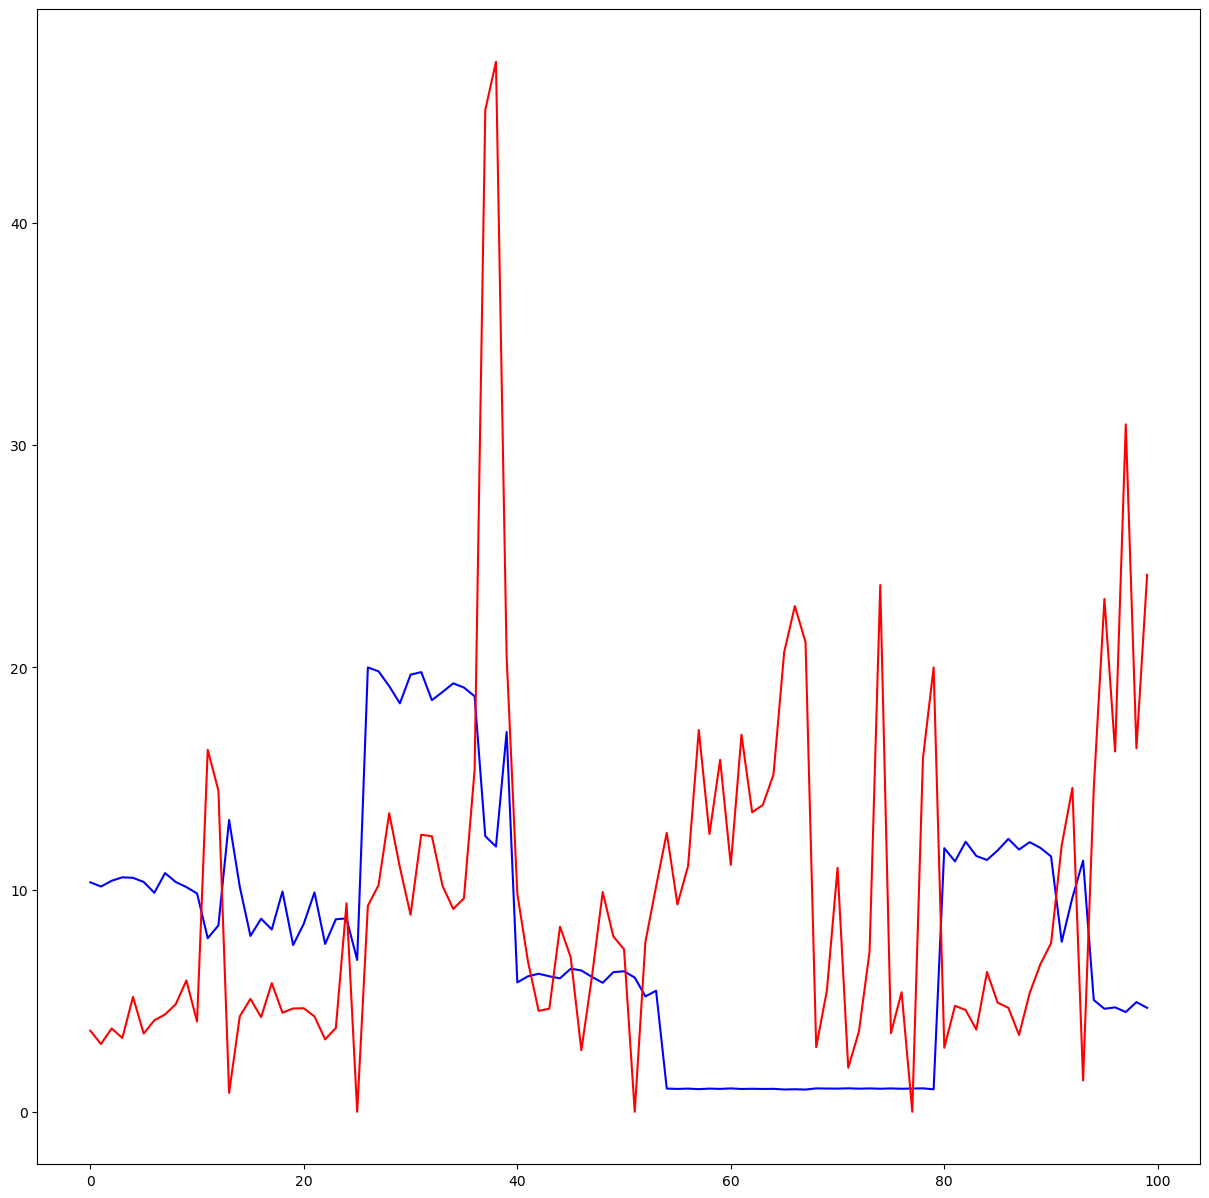

In [31]:
employed = df['Estimated Employed'].iloc[:100]
unemployed = df['Estimated Unemployment Rate (%)'].iloc[:100]

# Normalize the employed in range 1 to 20
employed = (employed - employed.min()) / (employed.max() - employed.min()) * 19 + 1

plt.figure(figsize=(15, 15))
plt.plot(employed, label='Employed', color='blue')
plt.plot(unemployed, label='Unemployed', color='red')
plt.show()

# Correlation between Employed and Unemployment Rate

In [32]:
print(df['Estimated Employed'].corr(df['Estimated Unemployment Rate (%)']))

-0.2228763995221479


In [33]:
df = df.drop(['Estimated Employed'], axis=1)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,40.67,Urban


# Unemployment Rate by Date

In [34]:
df[['Date', 'Month', 'Year']] = df['Date'].str.split('-', expand=True)
df = df.drop(['Date'], axis=1)
df

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Area,Month,Year
0,Andhra Pradesh,Monthly,3.65,43.24,Rural,05,2019
1,Andhra Pradesh,Monthly,3.05,42.05,Rural,06,2019
2,Andhra Pradesh,Monthly,3.75,43.50,Rural,07,2019
3,Andhra Pradesh,Monthly,3.32,43.97,Rural,08,2019
4,Andhra Pradesh,Monthly,5.17,44.68,Rural,09,2019
...,...,...,...,...,...,...,...
749,West Bengal,Monthly,7.55,44.09,Urban,02,2020
750,West Bengal,Monthly,6.67,43.34,Urban,03,2020
751,West Bengal,Monthly,15.63,41.20,Urban,04,2020
752,West Bengal,Monthly,15.22,40.67,Urban,05,2020


# Unemployment Rate by Area

In [35]:
group = df.groupby(['Region', 'Area']).agg({'Estimated Unemployment Rate (%)': 'mean'})
group

Estimated Unemployment Rate (%)
Region           Area                                  
Andhra Pradesh   Rural                         5.526429
                 Urban                         9.427857
Assam            Rural                         4.490833
                 Urban                         8.088571
Bihar            Rural                        16.770000
                 Urban                        21.066429
Chandigarh       Urban                        15.991667
Chhattisgarh     Rural                         6.628571
                 Urban                        11.852143
Delhi            Rural                        15.258571
                 Urban                        17.732143
Goa              Rural                         8.390000
                 Urban                        10.158333
Gujarat          Rural                         5.917143
                 Urban                         7.410714
Haryana          Rural                        25.012857
                 Urban                        27.553571
Himachal Pradesh Rural                        15.504286
                 Urban                        21.576429
Jammu & Kashmir  Rural                        14.951818
                 Urban                        17.549000
Jharkhand        Rural                        15.221429
                 Urban                        25.948571
Karnataka        Rural                         7.224286
                 Urban                         6.127857
Kerala           Rural                        10.341429
                 Urban                         9.906429
Madhya Pradesh   Rural                         5.653571
                 Urban                         9.159286
Maharashtra      Rural                         6.810000
                 Urban                         8.305000
Meghalaya        Rural                         2.475000
                 Urban                         7.301538
Odisha           Rural                         6.612857
                 Urban                         4.702857
Puducherry       Rural                         7.263333
                 Urban                        12.745000
Punjab           Rural                        11.925000
                 Urban                        12.137143
Rajasthan        Rural                        10.927143
                 Urban                        17.189286
Sikkim           Rural                         5.080000
                 Urban                         8.153333
Tamil Nadu       Rural                         8.775714
                 Urban                         9.792857
Telangana        Rural                         7.863571
                 Urban                         7.612143
Tripura          Rural                        27.166429
                 Urban                        29.534286
Uttar Pradesh    Rural                        10.208571
                 Urban                        14.894286
Uttarakhand      Rural                         4.882308
                 Urban                         8.162143
West Bengal      Rural                         7.572143
                 Urban                         8.677143